In [288]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [246]:
eda_data = pd.read_csv('clean_eda_data.csv')
eda_data.head()



,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [247]:

client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [248]:
eda_data = pd.read_csv('clean_eda_data.csv')
eda_data["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
eda_data["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
eda_data["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
eda_data["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
eda_data.drop(eda_data.columns[0], axis=1, inplace=True)
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [249]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [250]:
eda_data = pd.merge(eda_data,diff, on='id')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


**Average price changes as time passes**

By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.


In [251]:
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()


In [252]:
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [253]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

eda_data = pd.merge(eda_data, mean_prices[columns], on='id')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


### Max price changes across periods and months

Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [254]:
# Aggregate average prices per period by company and replacing org. values with mean values
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'})

In [255]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [256]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [257]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


In [258]:
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

eda_data = eda_data.drop(columns=remove)
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


**Transforming numerical data and categorical data as a predictive model cannot accept string values...**

In [259]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t', 'f'], [1, 0])
eda_data.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


In [260]:
# Transform into categorical type
eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')

# Let's see how many categories are within this column
print("\n  Value Counts of Channel Sales: \n")
eda_data['channel_sales'].value_counts()


  Value Counts of Channel Sales: 



channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We can use `dummy variables` to create a new feature for every unique value in a categorical column and classifies entries in this columns into either 0 or 1 to indicate that company does not or does belong to this category

In [261]:
eda_data = pd.get_dummies(eda_data, columns=['channel_sales'], prefix='channel')
eda_data = eda_data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.085483,0.146033,44.266930,8.145775,44.26693,False,False,True,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.085483,0.151367,44.444710,0.000000,44.44471,True,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.089162,0.172468,44.444710,0.000000,44.44471,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000,0.153133,44.444710,0.000000,44.44471,False,False,False,True,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.033743,0.055866,16.291555,8.145775,24.43733,True,False,False,False,False


In [262]:
# Transform into categorical type
eda_data['origin_up'] = eda_data['origin_up'].astype('category')

# Let's see how many categories are within this column
print("\n ----- Value Counts of Origin Up ----- \n")
eda_data['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [263]:
eda_data = pd.get_dummies(eda_data, columns=['origin_up'], prefix='origin_up')
eda_data = eda_data.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,8.145775,44.26693,False,False,True,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.000000,44.44471,True,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.000000,44.44471,False,False,True,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000,44.44471,False,False,False,True,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,8.145775,24.43733,True,False,False,False,False,True,False,False


In [264]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,159230.267032,573483.629064,0.0,5674.000000,14116.000000,40764.000000,6.207104e+06
cons_gas_12m,14605.0,28091.082506,162978.563803,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14605.0,16091.371448,64366.262314,0.0,0.000000,793.000000,3383.000000,7.712030e+05
forecast_cons_12m,14605.0,1868.638618,2387.651549,0.0,494.980000,1112.610000,2402.270000,8.290283e+04
forecast_cons_year,14605.0,1399.858747,3247.876793,0.0,0.000000,314.000000,1746.000000,1.753750e+05
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14605.0,63.090448,66.166636,0.0,16.180000,18.800000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [265]:
### Applying log10 transformation

eda_data["cons_12m"] = np.log10(eda_data["cons_12m"] + 1)
eda_data["cons_gas_12m"] = np.log10(eda_data["cons_gas_12m"] + 1)
eda_data["cons_last_month"] = np.log10(eda_data["cons_last_month"] + 1)
eda_data["forecast_cons_12m"] = np.log10(eda_data["forecast_cons_12m"] + 1)
eda_data["forecast_cons_year"] = np.log10(eda_data["forecast_cons_year"] + 1)
eda_data["forecast_meter_rent_12m"] = np.log10(eda_data["forecast_meter_rent_12m"] + 1)
eda_data["imp_cons"] = np.log10(eda_data["imp_cons"] + 1)

### Building an ML Prediction Model Using Random Forest Classifier 

In [266]:
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

# Tree Visualisation

In [267]:
# First let us make another df which is the same as 'df'
train_df = eda_data.copy()
X = eda_data.drop(columns=['id','churn'])
y = eda_data['churn']

In [268]:
X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,8.145775,44.266930,False,False,True,False,False,False,False,True
1,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,44.311378,...,0.000000,44.444710,True,False,False,False,False,True,False,False
2,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,44.311378,...,0.000000,44.444710,False,False,True,False,False,True,False,False
3,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,44.311378,...,0.000000,44.444710,False,False,False,True,False,True,False,False
4,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,40.606701,...,8.145775,24.437330,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,4.508812,4.680707,0.000000,3.667360,0.000000,0.0,1.291591,0.138305,0.000000,44.311378,...,0.000000,44.444710,False,False,True,False,False,False,False,True
14601,3.858778,0.000000,2.260071,2.801191,2.260071,0.0,2.161458,0.100167,0.091892,58.995952,...,28.122958,50.805737,False,False,True,False,False,False,False,True
14602,3.265996,0.000000,2.255273,2.281919,2.255273,0.0,2.115943,0.116900,0.100015,40.606701,...,8.145775,24.437330,False,False,True,False,False,False,False,True
14603,2.120574,0.000000,0.000000,1.308351,0.000000,0.0,0.912753,0.145711,0.000000,44.311378,...,0.000000,44.444710,False,False,True,False,False,False,False,True


In [269]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

In [270]:
print(X.shape)
print(y.shape)

(14605, 67)
(14605,)


In [271]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [272]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 67)
(10953,)
(3652, 67)
(3652,)


In [273]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [274]:
y_pred = rf_classifier.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([0, 0, 0, ..., 0, 0, 0])

## Evaluation of our Model

We are going to consider the following metrics to evaluate our model:
    - Accuracy
    - Precision
    - Recall
    - ROC & AUC

### Model Accuracy

In [279]:
accuracy = accuracy_score(y_test, y_pred)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

print("\n Accuracy score: \n", accuracy)


 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.86      0.05      0.09       373

    accuracy                           0.90      3652
   macro avg       0.88      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652


 Accuracy score: 
 0.9019715224534501


[[3276    3]
 [ 355   18]]


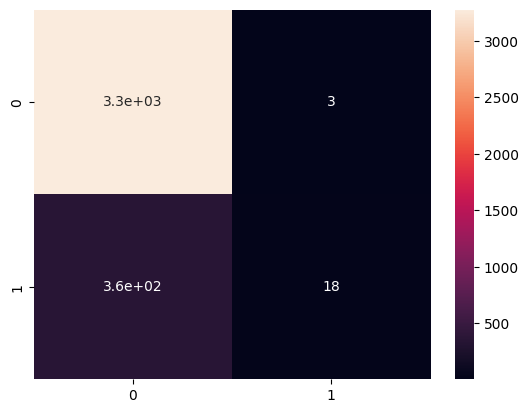

In [283]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [291]:
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score is:", f1_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print("AUC score:", auc)

Precision Score: 0.8571428571428571
Recall Score:  0.04825737265415549
F1 Score is: 0.09137055837563451
AUC score: 0.5236712297854492


In [292]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9

Cross-validation scores:[0.90643542 0.91191237 0.90917389 0.90730594 0.90730594]


In [296]:
print('Average cross-validation score: {:.5f}'.format(cv_scores.mean()))

Average cross-validation score: 0.90843


The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. There could be cases of false positives and false negatives that we need to consider.

**We need to conclude which features lead to most customer churning**

In [297]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

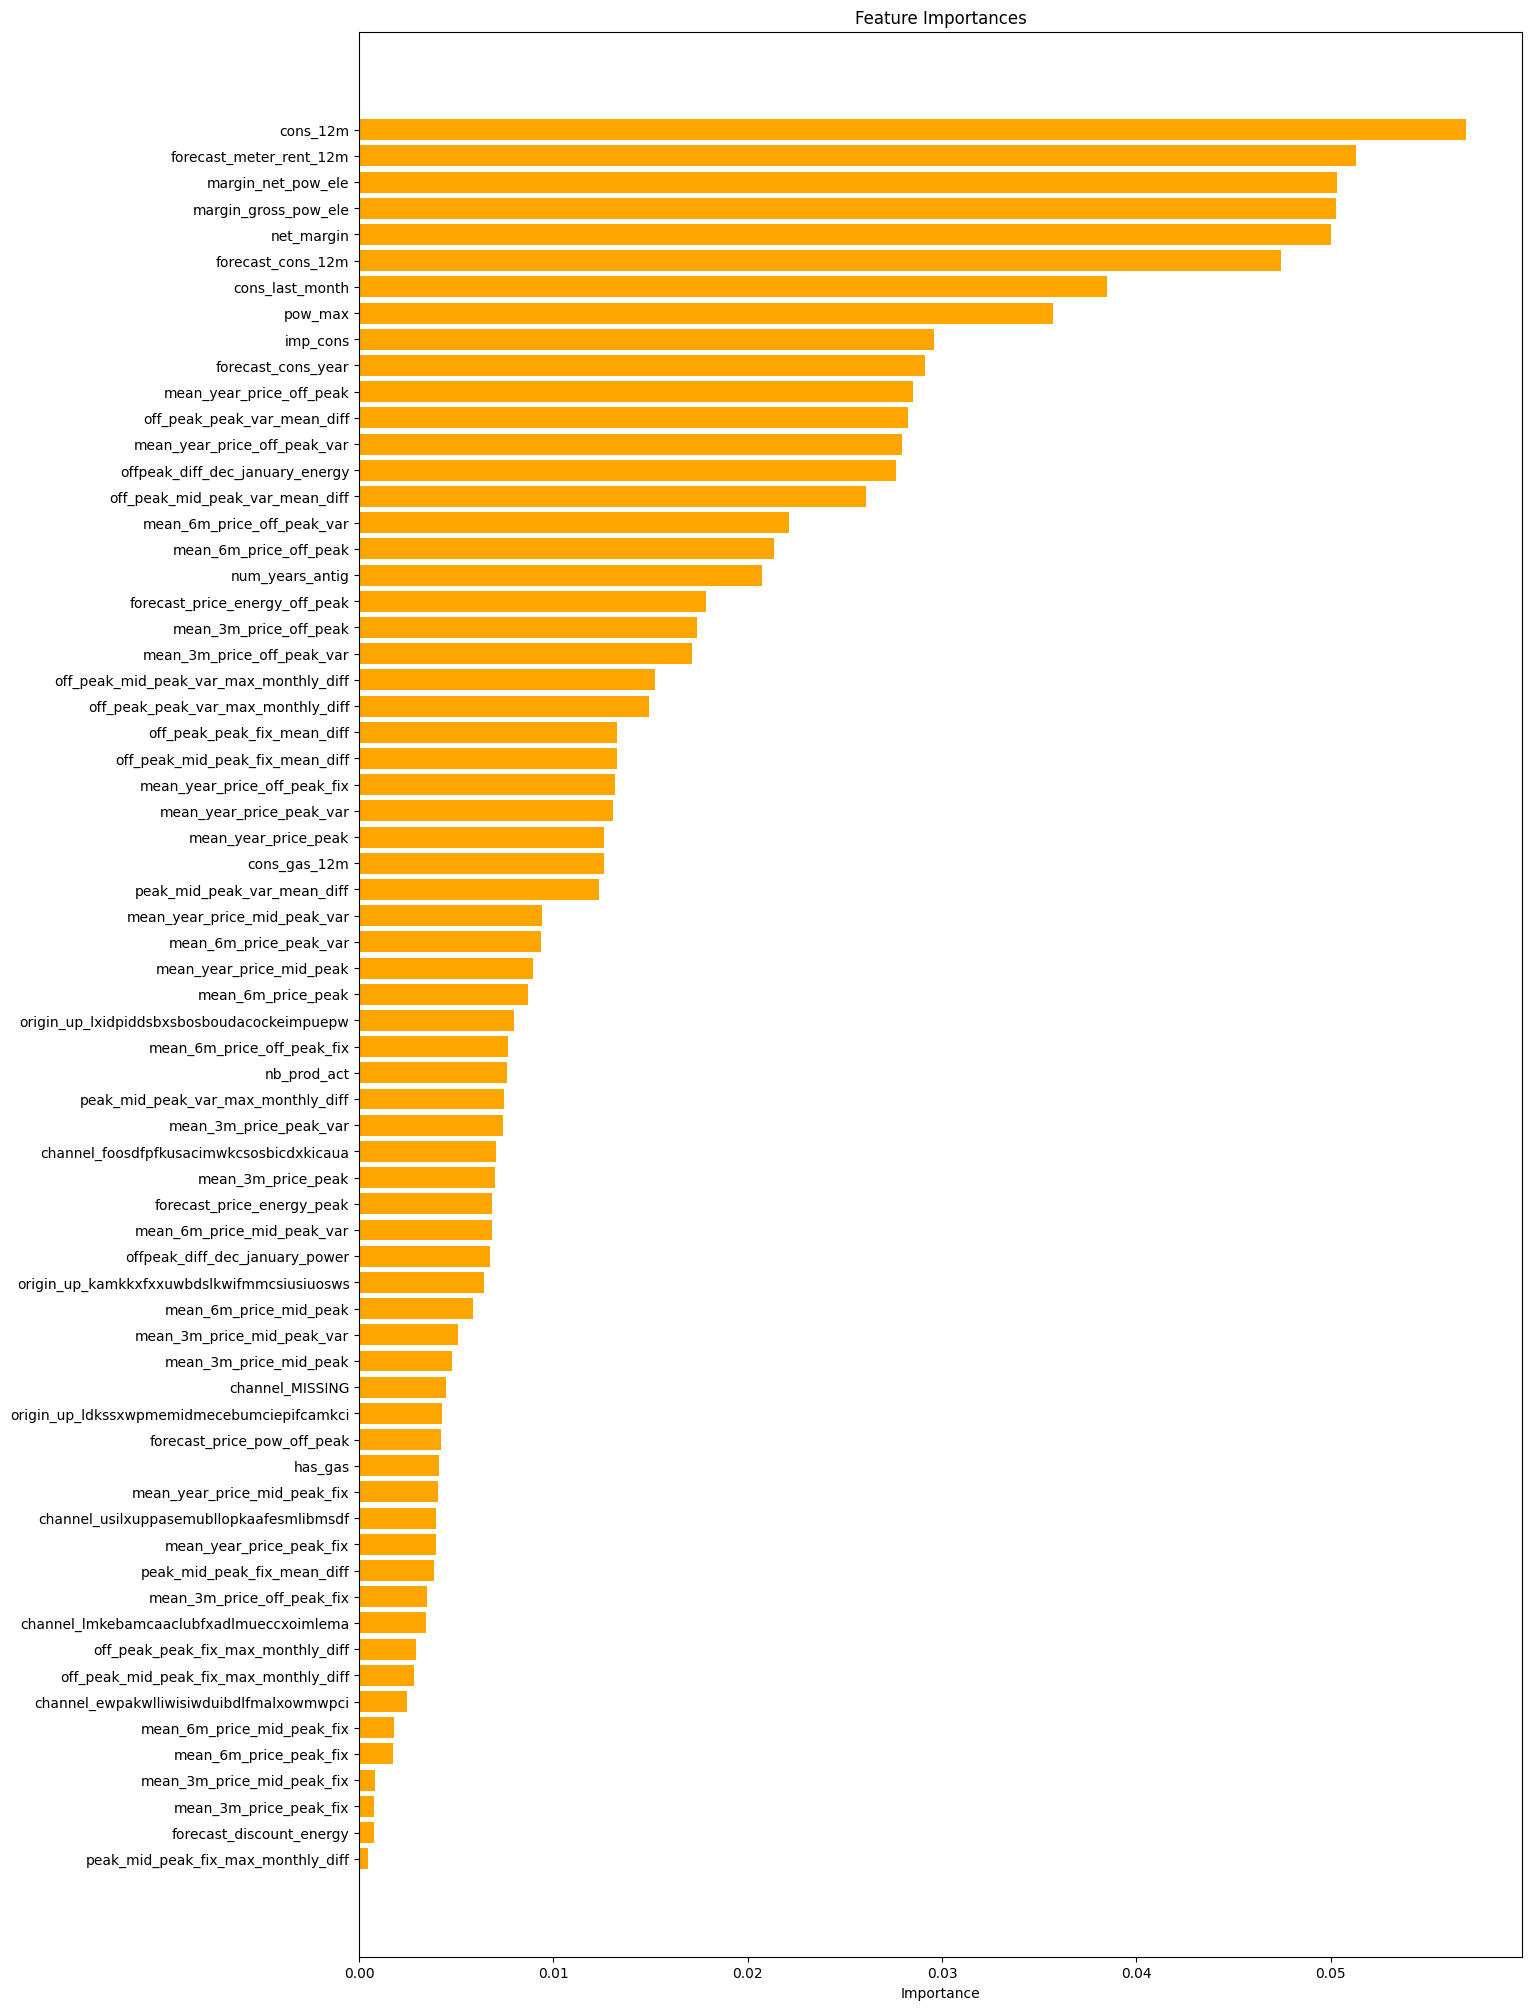

In [301]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importance')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='orange')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this graph, we can conclude that net power subscription and consumption over 12 months is a top driver for churn in this model.
Our price sensitivity features are scattered around but are not the main driver for a customer churning.
Forecasted bill of meter rental for the next 2 months also is an influential driver.